# Run a sample test

In [144]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import Ridge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
import mglearn1
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Craete Synthetic dataset
X,y=make_blobs(random_state=0)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =0)

In [4]:
logrec= LogisticRegression().fit(X_train,y_train)

In [5]:
print('Test Score {:.2f}'.format(logrec.score(X_test,y_test)))

Test Score 0.88


# <span style='color:red'>Cross Validation:-</span>
- k-fold cross validation , k = 5, 10...
- Partition dataset into k folds
- take 1 set of the partition as test set and remaining k-1 as training sets

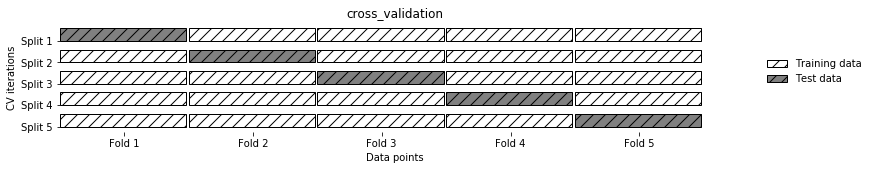

In [6]:
mglearn1.plots.plot_cross_validation()

In [7]:
# Cross validation function in SCIKIT Learn

from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [8]:
iris=load_iris()

In [9]:
logrec=LogisticRegression()

In [10]:
scores = cross_val_score(logrec,iris.data,iris.target)

In [11]:
print('Cross validaton score: {}'.format(scores))

Cross validaton score: [ 0.96078431  0.92156863  0.95833333]


In [12]:
scores=cross_val_score(logrec,iris.data,iris.target,cv=5)
print('Cross validation with 5 folds :{}'.format(scores))

Cross validation with 5 folds :[ 1.          0.96666667  0.93333333  0.9         1.        ]


In [13]:
# Summarized way is the mean
print('Cross validaton Score :{:.2f}'.format(scores.mean()))

Cross validaton Score :0.96


# Stratified k-fold cross validation and other strategies

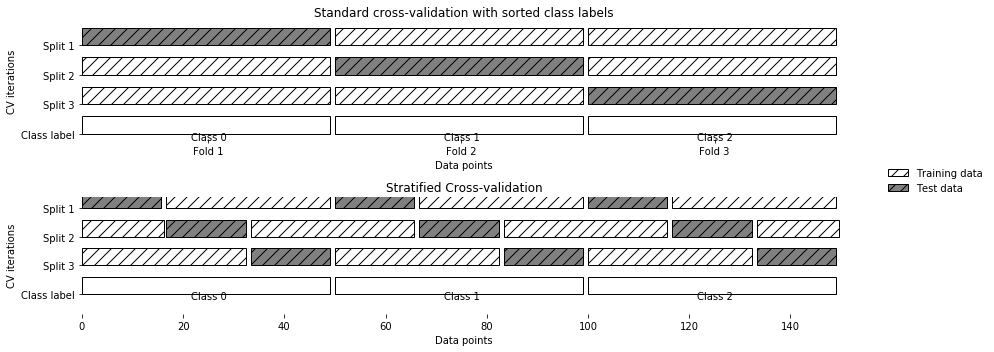

In [14]:
mglearn1.plots.plot_stratified_cross_validation()

# In STRATIFIED k-fold cross validation technique we split test and training data in such a way that PROPORTION of classes are equal as in the ORIGINAL set. 

## In the classification area , one should always use STRATIFIED K Fold cross validation , else if there is 10% of data sample belonging to class B, one of the set might have only class B and would not give good generalized test result

# <span style='color:red'>KFold function:-</span>
- Classification problem - DEFAULT to use STRATIFIED K Fold 
- Regression problem - Deafult to use regular K FOLD
- Special Scenario - If we want to reproduce someone's else result , use KFold function from model selection

In [15]:
from sklearn.model_selection import KFold

In [16]:
kfold = KFold(n_splits=5)
cross_val_score(logrec,iris.data,iris.target,cv=kfold)

array([ 1.        ,  0.93333333,  0.43333333,  0.96666667,  0.43333333])

In [17]:
kfold=KFold(n_splits=3)
cross_val_score(logrec,iris.data,iris.target,cv=kfold)

array([ 0.,  0.,  0.])

# Conclusion :- IRIS dataset has only three classes viz. 0,1,2 so its really bad idea to use three split only, As said above we might end up with TEST Set having one class not existing in TRAINING set. This function allows us to test that scenario

# How to avoid that: USE Shuffle before splitting the data

In [18]:
kfold=KFold(n_splits=3,shuffle=True,random_state=0)

In [19]:
cross_val_score(logrec,iris.data,iris.target,cv=kfold)

array([ 0.9 ,  0.96,  0.96])

# Leave One Out 

In [20]:
from sklearn.model_selection import LeaveOneOut

In [21]:
loo=LeaveOneOut()

In [22]:
scores=cross_val_score(logrec,iris.data,iris.target,cv=loo)

In [23]:
scores.mean()

0.95333333333333337

In [24]:
len(scores)

150

# Shuffle Split Cross Validation

In [25]:
from sklearn.model_selection import ShuffleSplit

In [26]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.7,n_splits=5,random_state=0)

In [27]:
cross_val_score(logrec,iris.data,iris.target,cv=shuffle_split)

array([ 0.88888889,  0.97777778,  0.86666667,  1.        ,  0.97777778])

# Cross validation with group
- Keep group in Training or Testing set 
- Use case --If Similar person emotional faces are both in training and testing then model might give false impression as having good GENERALIZATION
- ** Group should not be confused with class label **
- Group A = could be imgaes of PERSON A, Group B = Images of person B, Class could be different EMOTIONS ??
- Example - 1. taking multiple blood samples from the same patients viz. X,Y,Z...and using X or Y or Z or all samples in both training and test, the classifyer will not give good GENERALIZATION for new patients so better keep them either in TRAINING or TEST set 2. Similarly we may have multiple recordings of the same speaker splitting into both Training and TESTING might not give a GENERALIZED classifyer to classify the new SPEAKER 

In [28]:
from sklearn.model_selection import GroupKFold

In [29]:
group_kfold=GroupKFold(n_splits=3)

In [30]:
X,y=make_blobs(n_samples=12,random_state=0,centers=3)

In [31]:
# make groups
groups =[0,0,0,1,1,1,1,2,2,3,3,3]

In [32]:
scores=cross_val_score(logrec,X,y,groups=groups,cv=group_kfold)

In [33]:
scores

array([ 0.75      ,  0.8       ,  0.66666667])

# <span style='color:red'>Grid Serach: -
# 1. We know how to evaluate how well the model genralizes
# 2. Next step, How to fine tune model parameters to improve the PERFORMANCE (of Model GENERALIZATION)

## <span style ='color:magenta'> 1. Simple Grid Search - Naive grid search implementation </span>

In [34]:
# Take the classifier SVC with RBF (Radial Basis Function as KERNEL) and loop through KERNEL Bandwidth and 
# Regularization parameters (C)
from sklearn.svm import SVC

In [35]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [36]:
best_score =0
C_val=[0.001,0.01,0.1,1,10,100]
gamma_val=[0.001,0.01,0.1,1,10,100]

for gamma in gamma_val:
    for C in C_val:
        svc=SVC(C=C,gamma=gamma).fit(X_train,y_train)
        score =svc.score(X_test,y_test)
        if score >best_score:
            best_score = score
            best_parameters={'C':C,'gamma':gamma}

print('Best Score :{:.2f}'.format(best_score))
print('Best Parameters :{}'.format(best_parameters))

Best Score :0.97
Best Parameters :{'C': 100, 'gamma': 0.001}


# Training, Validation and Test Data set
- Model using training set 
- Select the best parameters using Validation Set
- Test the selected parameters using Test Set
- ** Next phase of model can be trained using TRAINING + VALIDATION set ==> More the data , better Model should be and Test using TEST data **

In [37]:
# Create three sets (Training, Validation & Test)
# Get the best parameters 
# Test with Test set

X_trainval,X_test,y_trainval,y_test =train_test_split(iris.data,iris.target,random_state = 0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=1)
X_train.shape,X_valid.shape,X_test.shape

((84, 4), (28, 4), (38, 4))

In [38]:
best_score =0
for gamma in gamma_val:
    for C in C_val:
        svm=SVC(C=C,gamma=gamma).fit(X_train,y_train)
        score =svm.score(X_valid,y_valid)
        if score > best_score:
            best_score = score
            best_parameters ={'C':C,'gamma':gamma}

svm=SVC(C=best_parameters['C'],gamma=best_parameters['gamma']).fit(X_trainval,y_trainval)
print('Test Set Score {:.2f}'.format(svm.score(X_test,y_test)))

Test Set Score 0.92


In [39]:
best_parameters

{'C': 10, 'gamma': 0.001}

# Grid search with cross validation

In [40]:
best_score =0
for gamma in gamma_val:
    for C in C_val:
        svm=SVC(C=C,gamma=gamma).fit(X_train,y_train)
        score = cross_val_score(svm,X_valid,y_valid,cv=5)
        score = np.mean(score)
        if score > best_score:
            best_score = score
            best_parameters ={'C':C,'gamma':gamma}

svm=SVC(C=best_parameters['C'],gamma=best_parameters['gamma']).fit(X_trainval,y_trainval)
print('Test Set Score {:.2f}'.format(svm.score(X_test,y_test)))

Test Set Score 0.97


In [41]:
best_parameters

{'C': 100, 'gamma': 0.001}

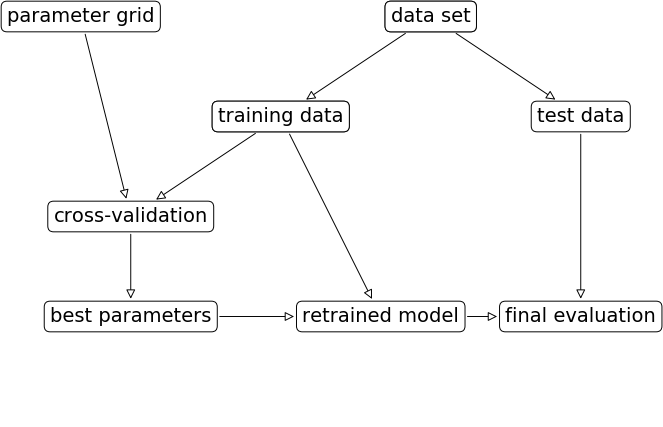

In [42]:
mglearn1.plots.plot_grid_search_overview()

# GridSearchCV class has automated the GRID + CV Search for best parameters
- Grid search runs the cross validation to find out the best parameters
- It is META-ESTIMATOR since this estimator is derived out from the other estimator
- Run, SCore, Predict method can be run on it and gives results that it has found as the best PARAMETERS
- This method not only searches for the best parameters but also automatically fits on the whole training dataset with best parameters it has found out of cross validation

In [43]:
param_grid ={'C':C_val,'gamma':gamma_val}

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
grid_search=GridSearchCV(SVC(),param_grid=param_grid,cv=5)

In [46]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
print('Score of test set {:.2f}'.format(grid_search.score(X_test,y_test)))

Score of test set 0.97


In [49]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01}

In [50]:
grid_search.best_score_

0.9732142857142857

In [51]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
import pandas as pd

In [53]:
result = pd.DataFrame(grid_search.cv_results_)

In [54]:
result.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.002593,0.000798,0.366071,0.366079,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,4.879549e-04,0.000399,0.011371,0.002852
1,0.000798,0.000399,0.366071,0.366079,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.990177e-04,0.000488,0.011371,0.002852
2,0.000997,0.000399,0.366071,0.366079,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.873843e-07,0.000489,0.011371,0.002852
3,0.000798,0.000199,0.366071,0.366079,0.001,1,"{'C': 0.001, 'gamma': 1}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.989220e-04,0.000399,0.011371,0.002852
4,0.000798,0.000199,0.366071,0.366079,0.001,10,"{'C': 0.001, 'gamma': 10}",22,0.375,0.363636,...,0.363636,0.366667,0.363636,0.366667,0.380952,0.362637,3.990415e-04,0.000399,0.011371,0.002852


# <span style='color:dark brown'>Visualize using HEAT MAP

In [55]:
scores=np.array(result.mean_test_score).reshape(6,6)

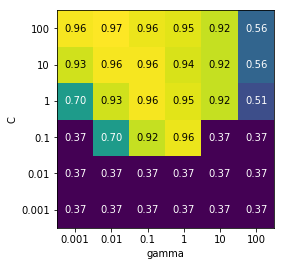

In [56]:
# Plot the mean CROSS-VALIDATION Score
mglearn1.tools.heatmap(scores,xlabel='gamma',xticklabels=param_grid['gamma'],ylabel='C',yticklabels=param_grid['C'],cmap='viridis')

# We can test Cross Validation over the range of gamma and C parameters and visualize

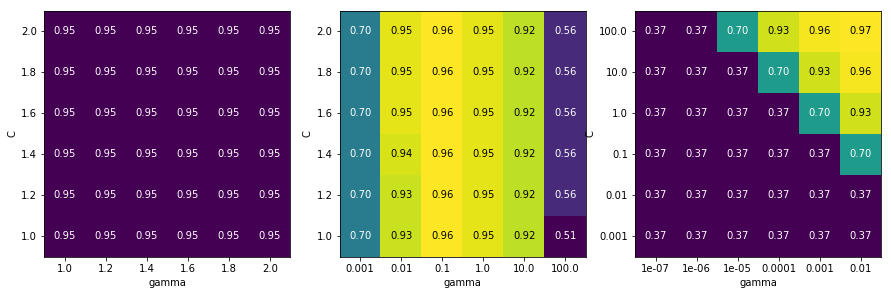

In [57]:
fig,axes = plt.subplots(1,3,figsize=(15,5))

param_grid_linear={'C':np.linspace(1,2,6),'gamma':np.linspace(1,2,6)}
param_grid_one_log={'C':np.linspace(1,2,6),'gamma':np.logspace(-3,2,6)}
param_grid_range={'C':np.logspace(-3,2,6),'gamma':np.logspace(-7,-2,6)}

for param_grid, ax in zip([param_grid_linear,param_grid_one_log,param_grid_range],axes):
    grid_search=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
    grid_search.fit(X_train,y_train)
    scores= grid_search.cv_results_['mean_test_score'].reshape(6,6)
    
    # Plot the mean CV
    score_images=mglearn1.tools.heatmap(scores,xlabel='gamma',ylabel='C',xticklabels=param_grid['gamma'],
                                        yticklabels=param_grid['C'],cmap='viridis',ax=ax)


# Search Over spaces that are not grid
- Enter all related/dependent parameters and the range of values
- GridSearchCV evaluates and stores the best parameeters and estimators 

In [58]:
param_grid=[{'kernel':['rbf'],'C':C_val,'gamma':gamma_val},{'kernel':['linear'],'C':C_val}]

In [59]:
grid_search=GridSearchCV(SVC(),param_grid,cv=5)

In [60]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [61]:
grid_search.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [62]:
grid_search.best_score_

0.9732142857142857

In [63]:
#Display the result in Pandas Data frame
#df = pd.DataFrame(grid_search.cv_results_)
#df.T

# <span style='color:blue'>Nested Cross validation</span>
- We have usually run the cross validation in X_train
- We can run CV using GridSearchCV usning multiple splits as below
- following example will run method and build = 6X6X5X5 models

In [64]:
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)

In [65]:
print('Cross validation Scores :{}'.format(scores))
print('Mean CV score is :{:.2f}'.format(scores.mean()))

Cross validation Scores :[ 0.96666667  1.          0.9         0.96666667  1.        ]
Mean CV score is :0.97


# Parallelizing cross-validation and grid search
- Its about allowing machine to run split and parameters in parallel , since doesn't have to run in sequence
- Scikit-learn doesn't allow parallel processing with multiple CPU-cores or over a cluster
- n_jobs = -1 attribute let script use up all cpus in teh m/c
- For SPARK users ==> recently-developed spark-sklearn package

# <span style='color:red'>Evaluation Metrics and Scoring</span>
- We have been using (a) SUPERVISED Classification -> fraction of true outcome (b) SUPERVISED Regression ==> R$^2$
- For practical application , above might not be the right mechanism  
** What's the right METRIC **  
** <span style='color:blue'> Keep the END Goal in Mind **</span>
- Think the bigger picture about BUSINESS and not merely about meeting ML TEST OUTPUT Result
- In practice we are interested not just in making accurate prediction , but using these prediction in making right decisions
- Think like , what is my HIGH-LEVEL Goal (Business Metric)
- High level business GOAL - More web users ? Users spending more money ? This metric will have direct impact from choosing and tuning up the right parameters

# Metrics for Binary Classification 
- common and conceptually simple application of ML
- FALSE POSITIVE(TYPE I),FALSE NEGATIVE(TYPE II)
- In COMMERCIAL applications we should MEASURE the impact of error in terms of DOLLARS, instead of accuracy==> will be easier for BUSINESS DECISION

# IMBALACED Data set 
- Dataset having very high observation of once class than the other
- ex. out of 100 ADVs showed to user , one 1 ADV ('Clicked' class) is clicked and 99 'Not Clicked"
- Lets say a model is built with 99% of accuracy , but it may not have factored IMBALANCED dataset into consideration
- Example in the code below - though score says 90% , but data set is quite imbalanced

# Confusion Matrices

In [66]:
from sklearn.datasets import load_digits

In [67]:
from sklearn.dummy import DummyClassifier

In [68]:
digits=load_digits()

In [69]:
X=digits.data
y=digits.target ==9

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [71]:
np.sum(y_test==True)

47

In [72]:
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)

In [73]:
pred_most_frequent=dummy_majority.predict(X_test)

In [74]:
np.sum(pred_most_frequent==True)

0

In [75]:
print('score = {:.2f}'.format(dummy_majority.score(X_test,y_test)))

score = 0.90


## <span style='color:red'> Let's use Decision TREE, Dummy, Logistic Regression to evaluate how model is responding to the imbalanced dataset , We see there is not much of difference in the score </span>

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)

In [78]:
pred_tree = tree.predict(X_test)
print('Test score :{:.2f}'.format(tree.score(X_test,y_test)))

Test score :0.92


In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
dummy = DummyClassifier().fit(X_train,y_train)

In [81]:
print('Dummy score :{:.2f}'.format(dummy.score(X_test,y_test)))

Dummy score :0.81


In [82]:
logrec=LogisticRegression(C=0.1).fit(X_train,y_train)

In [83]:
pred_logreg=logrec.predict(X_test)

In [84]:
print('Logistics score :{:.2f}'.format(logrec.score(X_test,y_test)))

Logistics score :0.98


In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion=confusion_matrix(y_test,pred_logreg)
confusion

array([[401,   2],
       [  8,  39]])

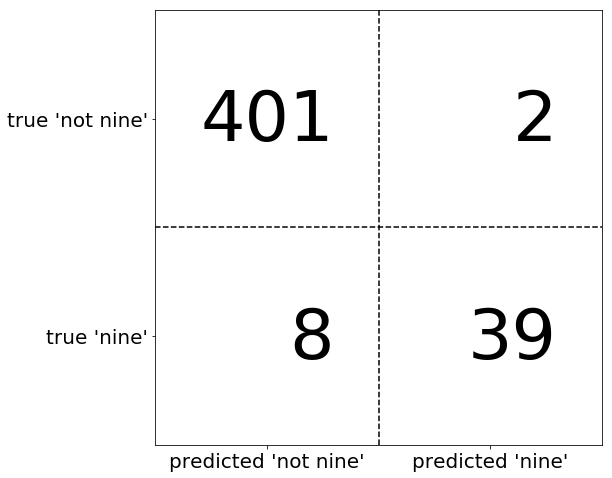

In [87]:
mglearn1.plots.plot_confusion_matrix_illustration()

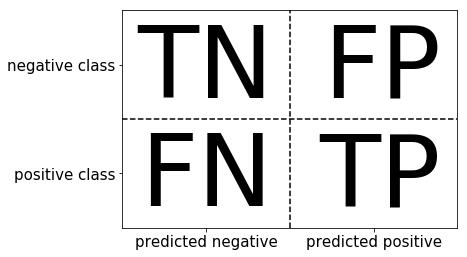

In [88]:
mglearn1.plots.plot_binary_confusion_matrix()

In [89]:
print('Most frequent class:')
print(confusion_matrix(y_test,pred_most_frequent))
print('\nDecision Tree:')
print(confusion_matrix(y_test,pred_tree))
print('\nLogistic Regression')
print(confusion_matrix(y_test,pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Decision Tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


# <span style='color:red'>Relationship to accuracy:-</span>
$Accuracy:\frac{TN+TP}{TN+FP+TP+FP}$


- **A: Precision** : How many samples are predicted as POSITIVE are actually POSITIVE  
- When GOAL is to limit the FP (ex.In clinical trials for DRUGS , goal is to limit the Flase Positive , since trials are very costly  
$Precision : \frac{TP}{FP+TP}$
- **B: Recall** : How many positive samples are captured by the positive prediction  
$Recall :\frac{TP}{FN+TP}$
- Another name: **SENSITIVITY, HIT Rate, TPR - True Positive Rate **. When the goal is performance measure, how effectively we are able to identify True Positive and reduce FALSE Negative. E.x. in the case of cancer patient, Model should be measured towards how effecively we were able to identify TRUE Cancer Patient and eliminates False Negative case. Reason being it might be fatal to those patients who have been identified 'Not having Cancer' but actually are cancer patient, if treatment is not done , might be fatal for them. So we need to avoid such cases and measure for that is RECALL, TPR, or SENSITIVITY  
- <span style='color:green'>** Tradeoff between PRECISION and RECALL**</span>
- If we predict all observation POSITIVE , then FN = 0 and RECALL/Sensitivity will be 100% but TN will also be 0. This will lead to many FALSE POSITIVES , so FP will be high and PRECISON will be LOW
- Conversely if we model in which we predict 1 or very few as POSITIVE just to be overtly sure and rest as NEGATIVE then we will have many a FALSE NEGATIVE. This means PRECISION is quite high i.e. $\frac{TP}{TP+FP}$ but RECALL/SENSITIVITY will be low since FN will also be high from RECALL = $\frac{TP}{TP+FN}$

## <span style='color:red'> F-Score / $F_1score$- Only one of the two import measures would not be enough to get the full picture so we can take F - measure which is the HARMONIC MEAN of both</span>

- $F = 2* \frac{PRECISION * RECALL}{PRECISION + RECALL}$

In [90]:
from sklearn.metrics import f1_score

In [91]:
print('f1 score for most frequent:{}'.format(f1_score(y_test,pred_most_frequent)))

f1 score for most frequent:0.0


C:\Users\Niraj Kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
print('f1 score for tree :{:.2f}'.format(f1_score(y_test,pred_tree)))
print('f1 score for Logistic Regression: {:.2f}'.format(f1_score(y_test,pred_logreg)))

f1 score for tree :0.55
f1 score for Logistic Regression: 0.89


# Note: 
- There is an error in the pred most frequent case since all the prediction is FALSE and denominator is 0
- ACCURACY vs F! Score : If we look into the accuracy alone , performnce of some of the model is not clear untill we see F! Score 
- FOr example F1 SCore for TREE and Logistic Regression is distinctly clear as compared to only ACCURACY Score
- F1 SCORE helps to guage the performance of model in most practical scenario , but at the same time very difficult to explain the elements of F1 Score

In [93]:
print('Accuracy score for LOGREC: {:.2f}'.format(logrec.score(X_test,y_test)))
print('Accuracy score for TREE: {:.2f}'.format(tree.score(X_test,y_test)))

Accuracy score for LOGREC: 0.98
Accuracy score for TREE: 0.92


# Classification Report: Use CR for more comprehensive report on f1_score, precision and recall

In [94]:
from sklearn.metrics import classification_report

In [95]:
print(classification_report(y_test,pred_logreg,target_names=['not nine','nine']))

             precision    recall  f1-score   support

   not nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



In [96]:
print(confusion_matrix(y_test,pred_logreg))

[[401   2]
 [  8  39]]


In [97]:
print(classification_report(y_test,pred_most_frequent,target_names=['not nine','nine']))

             precision    recall  f1-score   support

   not nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



C:\Users\Niraj Kumar\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [98]:
print(classification_report(y_test,pred_tree,target_names=['not nine','nine']))

             precision    recall  f1-score   support

   not nine       0.94      0.97      0.95       403
       nine       0.64      0.49      0.55        47

avg / total       0.91      0.92      0.91       450



# Taking Uncertainty into account
- most classifiers provide a **decision_function or predict_proba** method to assess degree of certainty about predictions
- Prediction depends upon the THRESHOLD value which is the output of decision_function or predict_proba
- The default value in the binary classification it is 0 for decision_function and 0.5 for predict_proba
- ** Example below **

In [99]:
from mglearn1.datasets import make_blobs

In [100]:
X,y=make_blobs(n_samples=(400,50),centers=2,cluster_std=[7.0,2],random_state=22)

In [101]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.5).fit(X_train,y_train)

In [102]:
print(classification_report(y_test,svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.94      0.88      0.91       104
          1       0.20      0.33      0.25         9

avg / total       0.88      0.84      0.86       113



In [103]:
#mglearn1.plots.plot_decision_threshold()
# This command is giving some error

# Conclusion: 
- recall for class 1 is low , class 0 is so high that classifiers focuses into getting class 0 right at the cost of class 1
- recall for 1 is low => means CORRECT PREDICTION of 1 divided by ACTUAL class 1 is low , CANCER situation so how can we increase RECALL for 1, may be we will have to decrease the threshold
- By decreasing THreshold we may have increased FALSE POSITIVE

In [104]:
y_pred_lower_threshold=svc.decision_function(X_test)>-0.8

In [105]:
print(classification_report(y_test,y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.81      0.89       104
          1       0.31      1.00      0.47         9

avg / total       0.95      0.82      0.86       113



# Note:
- Picking a threshold for models that implement the predict_proba method can be easier as it is fixed bewteen 0 to 1.

# Precision-Recall curves and ROC Curves
- Tradeoff between PRECISION and RECALL by adjusting the threshold of classifier decisions
- what does 90% RECALL Mean => miss 10% of positive sample
- Business objective define the criteria
- Look for all possibilities of recall & precision 
- Tool sis **precision-recall** curve

In [106]:
from sklearn.metrics import precision_recall_curve

In [107]:
X,y=make_blobs(n_samples=(4000,500),centers=2,cluster_std=[7.0,2],random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc=SVC(gamma=0.5).fit(X_train,y_train)
precision,recall,thresholds=precision_recall_curve(y_test,svc.decision_function(X_test))

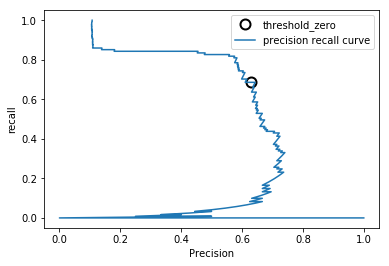

In [108]:
close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='threshold_zero',fillstyle='none',c='k',mew=2)
plt.plot(precision,recall,label='precision recall curve')
plt.xlabel('Precision')
plt.ylabel('recall')
_=plt.legend(loc='best')

# Now use different classifier , Random forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc=RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)

In [111]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [112]:
precision_rfc,recall_rfc,threshold_rfc=precision_recall_curve(y_test,rfc.predict_proba(X_test)[:,1])

In [113]:
close_default_rfc=np.argmin(np.abs(threshold_rfc-0.5))

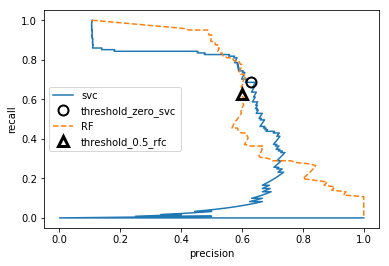

In [114]:
plt.plot(precision,recall,label='svc')
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='threshold_zero_svc',fillstyle='none',c='k',mew=2)

plt.plot(precision_rfc,recall_rfc,'--',label='RF')
plt.plot(precision_rfc[close_default_rfc],recall_rfc[close_default_rfc],'^',c='k',markersize=10,label='threshold_0.5_rfc',
         fillstyle='none',mew=3)
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

# Average precision score

In [115]:
from sklearn.metrics import average_precision_score

In [116]:
print('average precision score of SVC :{:.2f}'.format(average_precision_score(y_test,svc.decision_function(X_test))))
print('average precision score of RFC :{:.2f}'.format(average_precision_score(y_test,rfc.predict_proba(X_test)[:,1])))

average precision score of SVC :0.56
average precision score of RFC :0.67


# Receiver Operating Characterstics (ROC) and AUC (Area under Curve)
- Concept of TPR and FPR
- TPR = True Positive Rate is same RECALL
- TPR = $\frac{TP}{TP+FN}$ or TPR = $\frac{TP}{Actual Positive}$
- FPR = false Postive Rate = $\frac{FP}{TN+FP}$ or $\frac{FP}{Actual Negative}$

In [117]:
from sklearn.metrics import roc_curve

In [118]:
fpr,tpr,threshold=roc_curve(y_test,svc.decision_function(X_test))

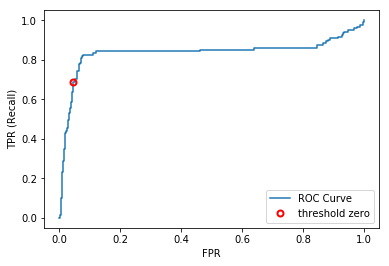

In [119]:
plt.plot(fpr,tpr,label='ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')
close_zero=np.argmin(abs(threshold))
plt.plot(fpr[close_zero],tpr[close_zero],'o',c='r',label='threshold zero',fillstyle='none',mew=2)
_=plt.legend(loc =4)

- red circle is the fpr and tpr vaue at default value of decision function which is 0
- There are opportunity to improve the score by changing threshold so that we can achieve the maximum TPR and least FPR
- The ideal value is at maximum TOP LEFT curve

# <span style='color:red'>NOTE: We should never choose the THRESHOLD based upon TEST but on a separate VALIDATION set</span>

# <span style='color:green'>ROC comparision between Random forest classifier and SVM</span>

In [120]:
fpr_rf,tpr_rf,thresh_rf=roc_curve(y_test,rfc.predict_proba(X_test)[:,1])

In [121]:
close_zero_rf=np.argmin(np.abs(thresh_rf - 0.5))

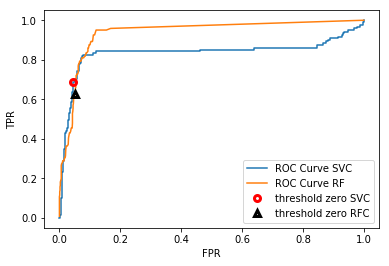

In [122]:
plt.plot(fpr,tpr,label='ROC Curve SVC')
plt.plot(fpr_rf,tpr_rf,label='ROC Curve RF')

plt.plot(fpr[close_zero],tpr[close_zero],'o',c='r',mew=3,fillstyle='none',label='threshold zero SVC')
plt.plot(fpr_rf[close_zero_rf],tpr_rf[close_zero_rf],'^',c='k',mew=3,fillstyle='none',label='threshold zero RFC')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc='best')


# SUMMARIZE the best CLASSIFIER with one Number. Its AUC = Area Under the Curve

In [123]:
from sklearn.metrics import roc_auc_score

In [124]:
rf_auc = roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
svc_auc=roc_auc_score(y_test,svc.decision_function(X_test))
print('AUC for Random Forest = {:.2f}'.format(rf_auc))
print('AUC for Support Vector Classifier = {:.2f}'.format(svc_auc))

AUC for Random Forest = 0.94
AUC for Support Vector Classifier = 0.84


## Note: AUC is the best metric for imbalanced or skewed data set. High AUC means Probability of the randomly picked point from the POSITIVE Class will have the higher score for positive class than Negative class. 

## <span style='color:red'> Take the example of DIGITS</span>

In [125]:
y=digits.target==9
X_train,X_test,y_train,y_test=train_test_split(digits.data,y,random_state=0)

gamma =1.00 accuracy =0.90 auc = 0.50
gamma =0.05 accuracy =0.90 auc = 1.00
gamma =0.01 accuracy =0.90 auc = 1.00


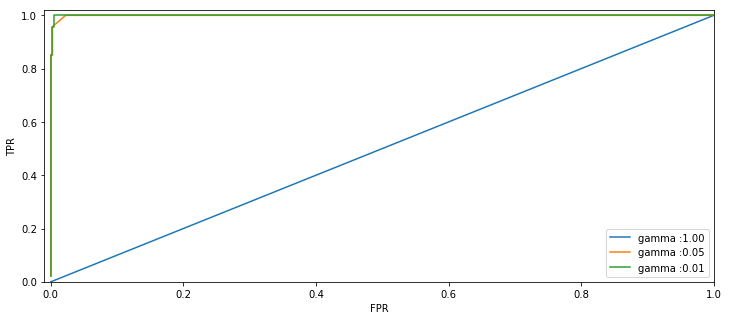

In [126]:
plt.figure(figsize=(12,5))

for gamma in [1,0.05,0.01]:
    svc=SVC(gamma=gamma).fit(X_train,y_train)
    accuracy=svc.score(X_test,y_test)
    auc=roc_auc_score(y_test,svc.decision_function(X_test))
    fpr,tpr,_=roc_curve(y_test,svc.decision_function(X_test))
    print('gamma ={:.2f} accuracy ={:.2f} auc = {:.2f}'.format(gamma,accuracy,auc))
    plt.plot(fpr,tpr,label='gamma :{:.2f}'.format(gamma))

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01,1)
plt.ylim(0,1.02)
plt.legend(loc='best')

# <span style='color:magenta'>Conclusions:-</span>
- AUC score is almost perfect when gamma = 0.01
- With this gamma and the right threshold we can very successfully classify the data
- If we had used only ACCURACY (which is same in all the cases), we would not have arrived to this level of perfection of classifier

# <span style='color:blue'>Metrics for MULTI CLASS CLASSIFICATION</span>
- Multiclass , say A = 85%, B= 10%, C=5%
- Accuracy => Same definition = Fraction of right result 

In [127]:
from sklearn.metrics import accuracy_score

In [131]:
X_train, X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)

In [132]:
lr=LogisticRegression().fit(X_train,y_train)

In [134]:
print('Accuracy Score = {:.2f}'.format(accuracy_score(y_test,lr.predict(X_test))))
print('Confusion Matrix = \n{}'.format(confusion_matrix(y_test,lr.predict(X_test))))

Accuracy Score = 0.95
Confusion Matrix = 
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


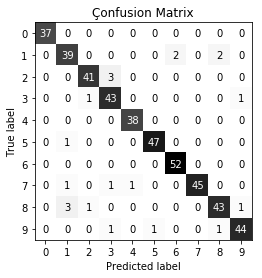

In [138]:
scores_image = mglearn1.tools.heatmap(confusion_matrix(y_test,lr.predict(X_test)),xlabel='Predicted label',ylabel='True label',
                                      xticklabels=digits.target_names,yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt='%d')
plt.title('Çonfusion Matrix')
plt.gca().invert_yaxis()

# <span style='color=red'>Note</span>
- First class 0, All 37 samples are correctly classified as 0, there is no **FALSE NEGATIVE** for CLASS 0
- No other DIGITS are MISTAKENLY classified as 0, bcuz all other entries in 1st column in 0 => so there is no **FALSE POSITIVE** for 0

# Use Classification Report Function

In [140]:
print('Classification_report :\n{}'.format(classification_report(y_test,lr.predict(X_test))))

Classification_report :
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



# Note:-
- classification report (we treat each row as positive class)
- class 0-> precision is 1 , because class 0 doesn't have FALSE POSITIVE. No claas has classified incorrectly for this class '0'.
- class 0-> recall is 1, because FP / AP is 1, or FALSE NEGATIVE is 0, meaning no observation of this class '0'has been wrongly classified other than '0'. Look into the row.
- class 8-> PRECISION = $\frac{TP}{TP+FP} = \frac{43}{43+1+2} = 0.93$
- class 8-> RECALL =$\frac{TP}{TP+FN} =\frac{43}{43+3+1+1} = 0.90$

# Multiclass f1 Score : Treat positive to the class being analyzed and rest negatives
- f1 score(0) = Positive class = 0 , Negative class = all others
- macro : Give equal weightage to all class 
- weightage = Give weightage to the class per their number of samples (Classification Metrics)
- micro = averaging computes the total numbers of TP,TN and TP over all classes => then computes PRECISION, RECALL and F-SCORE

In [143]:
print('Micro average f1 score {:.3f}'.format(f1_score(y_test,lr.predict(X_test),average='micro')))
print('Macro average f1 score {:.3f}'.format(f1_score(y_test,lr.predict(X_test),average='macro')))

Micro average f1 score 0.953
Macro average f1 score 0.954


# Using evaluation metrics in model selection
- Often we use AUC metric in model selection using GridSerachCV and cross_val_score
- use scoring parameter in Scikit-Learn, provide STRING that is the name of EVALUATION METRIC
- example of NINE DIGIT

In [153]:
print('Default score {}'.format(cross_val_score(SVC(),digits.data,digits.target==9)))

Default score [ 0.89983306  0.89983306  0.89983306]


In [154]:
explicit_accuracy = cross_val_score(SVC(),digits.data,digits.target==9,scoring='accuracy')

In [155]:
print('Explicit Accuracy score : {}'.format(explicit_accuracy))

Explicit Accuracy score : [ 0.89983306  0.89983306  0.89983306]


In [158]:
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,scoring='roc_auc')

In [159]:
print('AUC Scoring is : {}'.format(roc_auc))

AUC Scoring is : [ 0.99372294  0.98957947  0.99594929]


# Using GridSearchCV 
- Prepare dataset X_train, X_test etc.
- Prepare parameter grid using gamma only this time
- Call GridSearchCV with SVC as classifier and parameter grid
- Fit Grid using X_train
- Test grid using accuracy and roc_suc as scoring metrics

In [160]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target==9,random_state=0)

In [161]:
param_grid={'gamma':[0.0001,0.01,0.1,1,10]}

In [175]:
## Using default SCORING value as ACCURACY #######
##################################################
grid=GridSearchCV(SVC(),param_grid=param_grid)

In [176]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

# Grid search with accuracy

In [174]:
print('Grid Search with Accuracy')
print('best parameters:\n{}'.format(grid.best_params_))
print('Best cross validation score :\n{:.3f}'.format(grid.best_score_))
print('Test Set AUC: \n{:.3f}'.format(roc_auc_score(y_test,grid.decision_function(X_test))))
print('Test Set Accuracy :\n{:.3f}'.format(grid.score(X_test,y_test)))

Grid Search with Accuracy
best parameters:
{'gamma': 0.0001}
Best cross validation score :
0.970
Test Set AUC: 
0.992
Test Set Accuracy :
0.973


# <span style='color:blue'>Using Scoring method = ROC_AUC</span>

In [178]:
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring='roc_auc')

In [179]:
grid.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.0001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [185]:
print('Grid search with AUC ')
print('Best parameters {}'.format(grid.best_params_))
print('Best Cross validation score :{:.2f}'.format(grid.best_score_))
print('Test set Score : {:.2f}'.format(grid.score(X_test,y_test)))
print('Test Set AUC :{:.2f}'.format(roc_auc_score(y_test,grid.decision_function(X_test))))

Grid search with AUC 
Best parameters {'gamma': 0.01}
Best Cross validation score :1.00
Test set Score : 1.00
Test Set AUC :1.00
